In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

                
TICKER = 'AAPL'

                
df = yf.download(TICKER, start="2022-01-01", end="2023-01-01")            
df.index = pd.to_datetime(df.index)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.273605,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,176.998337,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.290192,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.414124,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.581573,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631378,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818390,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865593,85438400


## SMA

Text(0, 0.5, 'Price')

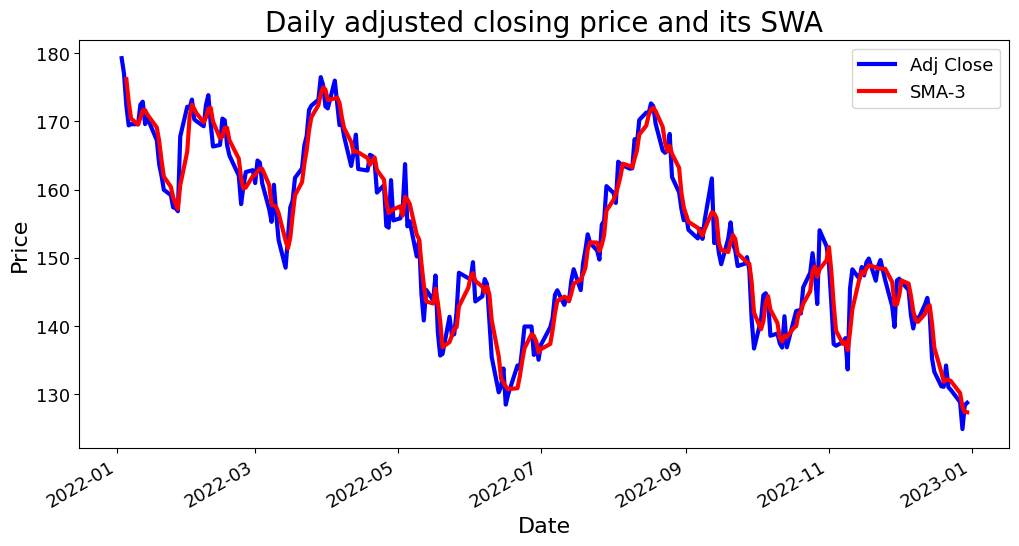

In [2]:
window = 3         
SMA1 = "SMA-"+str(window)           
df[SMA1] = df['Adj Close'].rolling(window).mean() 
colnames = ["Adj Close",SMA1] 
df2 = df[colnames].copy()

# colors for the line plot

                
colors = ['blue', 'red']

                
# line plot for original price and SMA            
df2.plot(color=colors, linewidth=3, figsize=(12,6))

                
# modify ticks size                
plt.xticks(fontsize=13)         
plt.yticks(fontsize=13)      
plt.legend(labels = colnames, fontsize=13)

                
# title and labels            
plt.title('Daily adjusted closing price and its SWA', fontsize=20)          
plt.xlabel('Date', fontsize=16)               
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

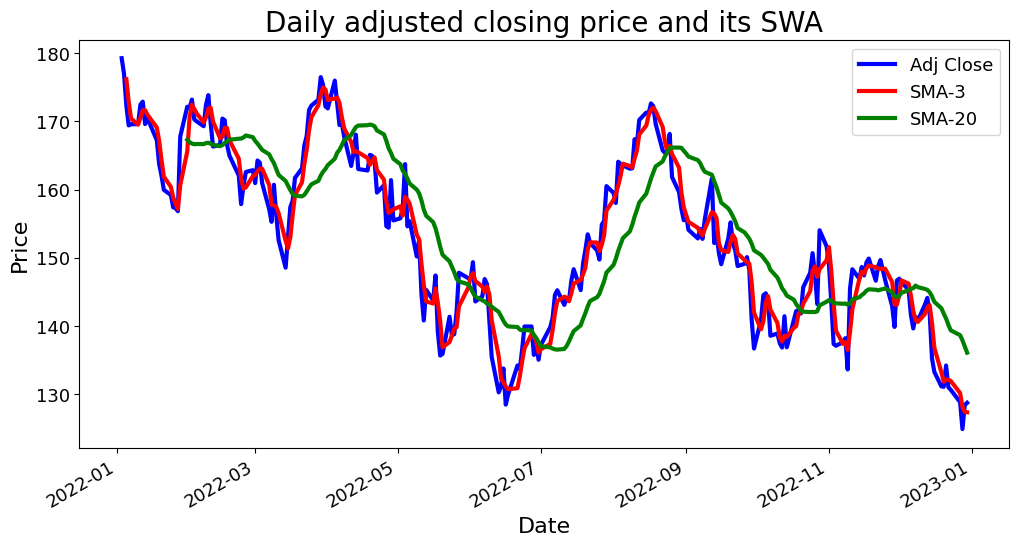

In [3]:
window = 20           
SMA2 = "SMA-"+str(window)            
df2[SMA2] = df2['Adj Close'].rolling(window).mean()   

colnames = ["Adj Close",SMA1,SMA2]

# colors for the line plot
colors = ['blue', 'red', 'green']

# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))

                
# modify ticks size

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)

                
# title and labels
plt.title('Daily adjusted closing price and its SWA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)


## EMA

Text(0, 0.5, 'Price')

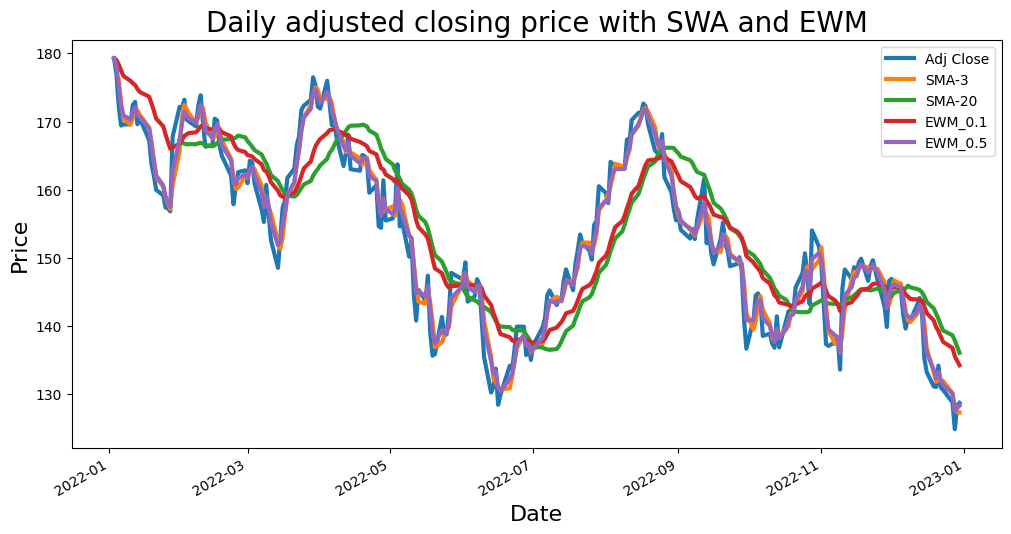

In [4]:
alpha = 0.1                
df2['EWM_'+str(alpha)] = df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()
alpha = 0.5
df2['EWM_'+str(alpha)]= df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()

df2.plot(linewidth=3, figsize=(12,6))

plt.title('Daily adjusted closing price with SWA and EWM', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

## Trend-following trading strategy

In [5]:
df2['SMA-3'] = df2['SMA-3'].shift(1) # short term
df2['SMA-20'] = df2['SMA-20'].shift(1) # long term

df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-20'], 1, 0) # buy
df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-20'], -1, df2['signal']) # sell 
df2.dropna(inplace=True)

print(df2.info)
print( df2['signal'].value_counts())

<bound method DataFrame.info of              Adj Close       SMA-3      SMA-20     EWM_0.1     EWM_0.5  signal
Date                                                                          
2022-02-01  171.984879  165.582581  167.307758  167.299439  169.687536      -1
2022-02-02  173.196365  170.635457  166.943322  167.889132  171.441951       1
2022-02-03  170.300568  172.444514  166.753223  168.130275  170.871259       1
2022-02-04  170.014587  171.827271  166.653742  168.318706  170.442923       1
2022-02-07  169.294662  171.170507  166.683765  168.416302  169.868793       1
...                ...         ...         ...         ...         ...     ...
2022-12-23  130.631378  132.084366  140.155292  137.675058  131.380296      -1
2022-12-27  128.818390  131.939067  139.350363  136.789391  130.099343      -1
2022-12-28  124.865593  130.149226  138.647473  135.597011  127.482468      -1
2022-12-29  128.402344  128.105120  137.898022  134.877544  127.942406      -1
2022-12-30  128.7193

## Buy and Hold

action
 0.0    216
 2.0      7
-2.0      7
Name: count, dtype: int64
             Adj Close  log_return_buy_n_hold  log_return_trend_follow  action
Date                                                                          
2022-02-01  171.984879                    NaN                      NaN     NaN
2022-02-02  173.196365               0.007019                 0.007019     2.0
2022-02-03  170.300568              -0.016861                -0.016861     0.0
2022-02-04  170.014587              -0.001681                -0.001681     0.0
2022-02-07  169.294662              -0.004243                -0.004243     0.0
2022-02-08  172.420944               0.018298                 0.018298     0.0
2022-02-09  173.850967               0.008260                 0.008260     0.0
2022-02-10  169.748291              -0.023882                -0.023882     0.0
2022-02-11  166.316254              -0.020426                -0.020426     0.0
2022-02-14  166.552963               0.001422                 

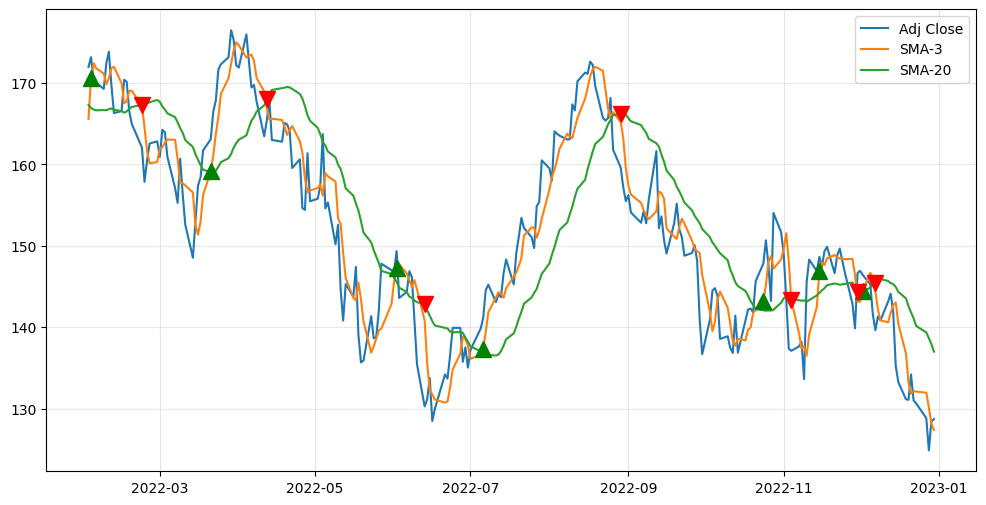

In [15]:
df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff() #profit compare to yesterday
df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']

df2['action'] = df2.signal.diff()
print(df2['action'].value_counts())

print(df2[['Adj Close','log_return_buy_n_hold','log_return_trend_follow','action']][:20])


plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)              
plt.plot(df2['Adj Close'], label = 'Adj Close')             
plt.plot(df2['SMA-3'], label = 'SMA-3')             
plt.plot(df2['SMA-20'], label = 'SMA-20')            
plt.plot(df2.loc[df2.action == 2].index, df2['SMA-3'][df2.action == 2], '^', color = 'g', markersize = 12)             
plt.plot(df2[df2.action == -2].index, df2['SMA-20'][df2.action == -2], 'v',color = 'r', markersize = 12)             
plt.legend(loc=1);

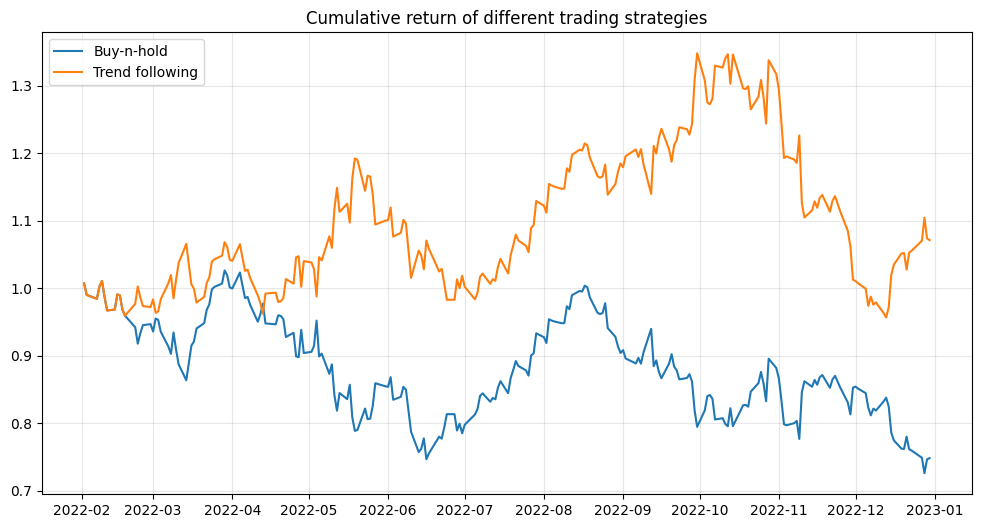

In [7]:
plt.plot(np.exp(df2['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')
        
plt.plot(np.exp(df2['log_return_trend_follow']).cumprod(), label='Trend following')
          
plt.legend(loc=2)
        
plt.title("Cumulative return of different trading strategies")
         
plt.grid(True, alpha=.3)

In [8]:
print(np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] -1)
print(np.exp(df2['log_return_trend_follow']).cumprod()[-1] -1)

-0.2515659156464345
0.07119427904647213


C:\Users\ben.xian\AppData\Local\Temp\ipykernel_29932\413598481.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] -1)
C:\Users\ben.xian\AppData\Local\Temp\ipykernel_29932\413598481.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(df2['log_return_trend_follow']).cumprod()[-1] -1)
